# Audio Visual based person recognition using custom model

1. Our idea is based on following architecture

![Image Description](1.jpg)

## Dataset

Creating the TEST and TRAIN Dataset for each folder/zip of VIDTIMIT. Name of the folder will be class label. so total 42 class labels.

In [1]:
dir = "/content/drive/MyDrive/VIDTIMIT DATASET"

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Uncomment Below Code for Data Processing [ONLY IF NEEDED]**

In [2]:
# import os
# import shutil

# def move_files(source_dir, target_dir):
#     for root, dirs, files in os.walk(source_dir):
#         for file in files:
#             # construct the full path to the file
#             source_file = os.path.join(root, file)
#             # construct the full path to the target file
#             target_file = os.path.join(target_dir, file)
#             # move the file to the target directory
#             shutil.move(source_file, target_file)
#             print(f"Moved {source_file} to {target_file}")

# # specify the source directory and target directory
# source_dir = dir + "/audio"
# target_dir = dir

# # call the function to move the files
# move_files(source_dir, target_dir)

In [3]:
# !pip install split-folders

In [4]:
# import splitfolders

# splitfolders.ratio(dir, # The location of dataset
#                    output="/content/drive/MyDrive/VIDTIMIT AFTER DP", # The output location
#                    seed=42, # The number of seed
#                    ratio=(.7, .2, .1), # The ratio of splited dataset
#                    group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
#                    move=False # If you choose to move, turn this into True
#                    )

Converting document Tpye images to the .JPEG : 

In [5]:
# from PIL import Image
# import os

# # Set the directory path where the images are located
# dir = "/content/drive/MyDrive/VIDTIMIT AFTER DP/"
# folderName = ["train/fadg0", "train/faks0", "train/fcft0", "train/fcmh0",
#               "test/fadg0", "test/faks0", "test/fcft0", "test/fcmh0",
#               "val/fadg0", "val/faks0", "val/fcft0", "val/fcmh0"]

# for fold in folderName:
#   data_dir = dir + fold

#   # Set the output directory path for the converted images
#   output_dir = data_dir

#   # Create the output directory if it doesn't exist
#   if not os.path.exists(output_dir):
#       os.makedirs(output_dir)

#   # Loop through each file in the directory
#   for filename in os.listdir(data_dir):
#       # Check if the file is a document type image
#       if filename.endswith(".wav"):
#         pass
#       else:
#           # Open the image using Pillow
#           img = Image.open(os.path.join(data_dir, filename))
#           # Save the image in jpeg format to the output directory
#           new_filename = os.path.splitext(filename)[0] + ".jpeg"
#           img.save(os.path.join(output_dir, new_filename), "JPEG")
#           print(f"Converted {filename} to {new_filename}")
#           os.remove(os.path.join(data_dir, filename))

_______________________________________


** Creating train and Validation data objects **




In [6]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds_img = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/VIDTIMIT AFTER DP/train/",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1358 files belonging to 4 classes.


In [9]:
test_ds_img = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/VIDTIMIT AFTER DP/test/",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 197 files belonging to 4 classes.


In [10]:
val_ds_img = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/VIDTIMIT AFTER DP/val/",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 383 files belonging to 4 classes.


In [11]:
class_names = train_ds_img.class_names
print("Class Names:\n\n", class_names)

Class Names:

 ['fadg0', 'faks0', 'fcft0', 'fcmh0']


For Audio:

In [13]:
train_ds_Audio = tf.keras.utils.audio_dataset_from_directory(
  "/content/drive/MyDrive/VIDTIMIT AFTER DP/train/",
  # output_sequence_length=64000
  )

Found 21 files belonging to 4 classes.


In [14]:
val_ds_Audio = tf.keras.utils.audio_dataset_from_directory(
  "/content/drive/MyDrive/VIDTIMIT AFTER DP/val/",
  # output_sequence_length=64000
  )

Found 14 files belonging to 4 classes.


In [15]:
test_ds_Audio = tf.keras.utils.audio_dataset_from_directory(
  "/content/drive/MyDrive/VIDTIMIT AFTER DP/test/",
  # output_sequence_length=64000
  )

Found 5 files belonging to 4 classes.


In [16]:
label_names = np.array(train_ds_Audio.class_names)
print()
print("label names:", label_names)


label names: ['fadg0' 'faks0' 'fcft0' 'fcmh0']


In [17]:
def squeeze(audio, labels):
  # audio = tf.squeeze(audio)
  audio = tf.reduce_mean(audio, 2)
  print(audio, type(audio))
  return audio, labels


train_ds_Audio = train_ds_Audio.map(squeeze, tf.data.AUTOTUNE)
val_ds_Audio = val_ds_Audio.map(squeeze, tf.data.AUTOTUNE)

Tensor("Mean:0", shape=(None, None), dtype=float32) <class 'tensorflow.python.framework.ops.Tensor'>
Tensor("Mean:0", shape=(None, None), dtype=float32) <class 'tensorflow.python.framework.ops.Tensor'>


In [18]:
for example_audio, example_labels in train_ds_Audio.take(1):  
  print(example_audio.shape)
  print(example_labels.shape)
# train_ds_Audio = tf.reshape(train_ds_Audio, (21, 1600))

(21, 276480)
(21,)


## Visualisation

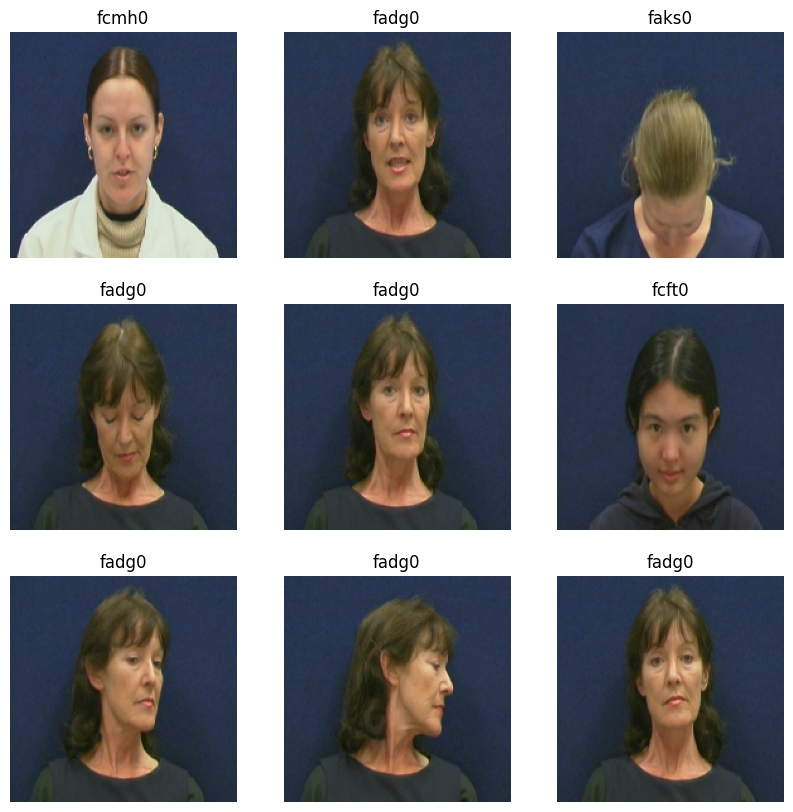

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds_img.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

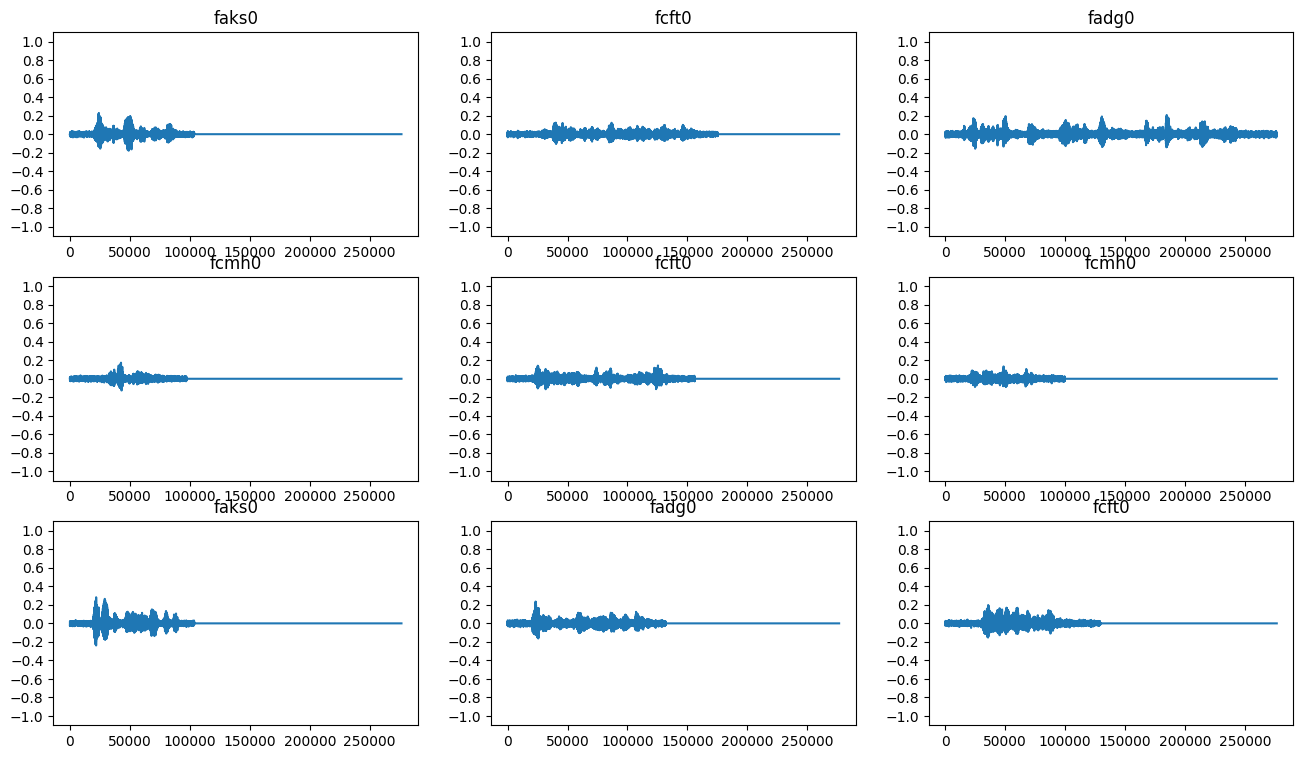

In [19]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
  if i>=n:
    break
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(example_audio[i].numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label_names[example_labels[i]]
  ax.set_title(label)
  ax.set_ylim([-1.1,1.1])

plt.show()

In [20]:
def get_spectrogram(waveform):
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=64)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

In [21]:
from IPython import display

for i in range(3):
  label = label_names[example_labels[i]]
  waveform = example_audio[i]
  spectrogram = get_spectrogram(waveform)
  print('Label:', label)
  print('Waveform shape:', waveform.shape)
  print('Spectrogram shape:', spectrogram.shape)
  print('Audio playback')
  display.display(display.Audio(waveform, rate=32000))

Label: faks0
Waveform shape: (276480,)
Spectrogram shape: (4317, 129, 1)
Audio playback


Label: fcft0
Waveform shape: (276480,)
Spectrogram shape: (4317, 129, 1)
Audio playback


Label: fadg0
Waveform shape: (276480,)
Spectrogram shape: (4317, 129, 1)
Audio playback


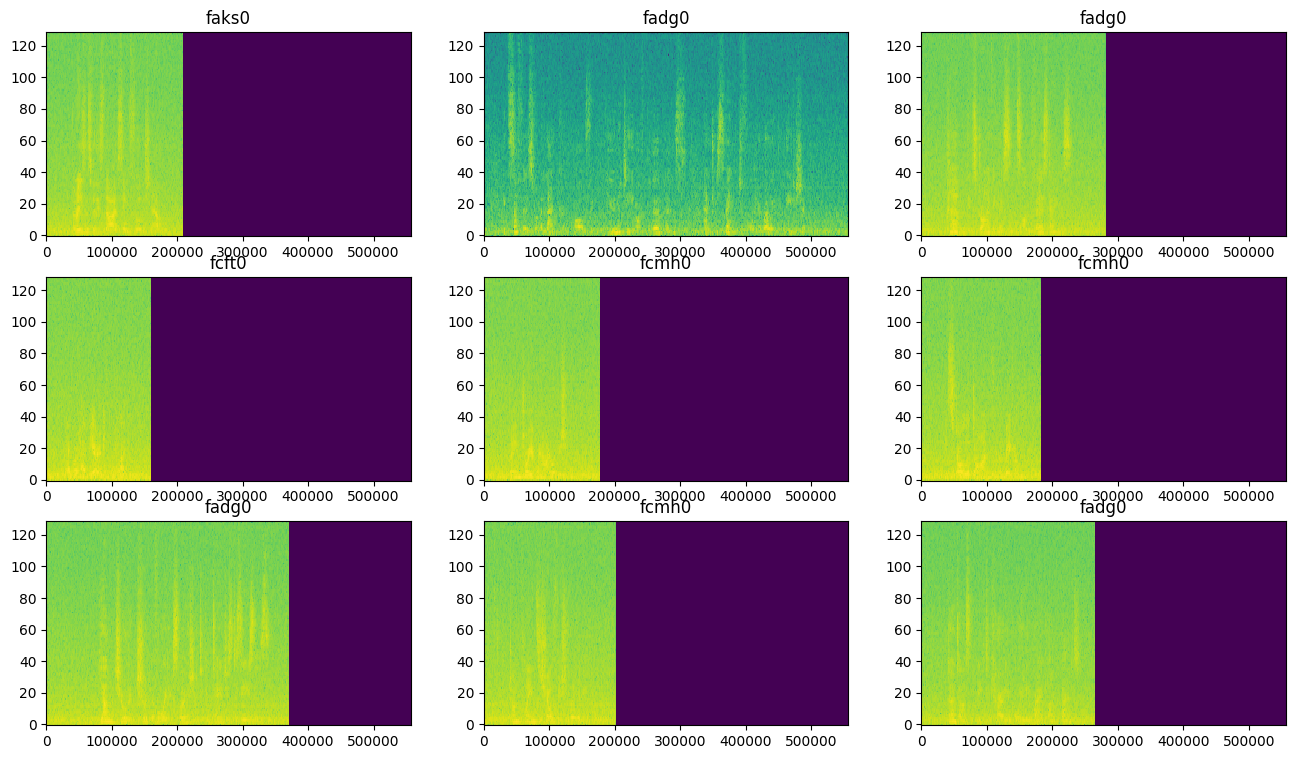

In [ ]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(example_spectrograms[i].numpy(), ax)
    ax.set_title(label_names[example_spect_labels[i].numpy()])

plt.show()

In [22]:
def make_spec_ds(ds):
  return ds.map(
      map_func=lambda audio,label: (get_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)

In [23]:
train_spectrogram_ds = make_spec_ds(train_ds_Audio)
val_spectrogram_ds = make_spec_ds(val_ds_Audio)
test_spectrogram_ds = make_spec_ds(test_ds_Audio)

In [24]:
# def plot_spectrogram(spectrogram, ax):
#   if len(spectrogram.shape) > 2:
#     assert len(spectrogram.shape) == 3
#     spectrogram = np.squeeze(spectrogram, axis=-1)
#   # Convert the frequencies to log scale and transpose, so that the time is
#   # represented on the x-axis (columns).
#   # Add an epsilon to avoid taking a log of zero.
#   log_spec = np.log(spectrogram.T + np.finfo(float).eps)
#   height = log_spec.shape[0]
#   width = log_spec.shape[1]
#   X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
#   Y = range(height)
#   ax.pcolormesh(X, Y, log_spec)

# rows = 3
# cols = 3
# n = rows*cols
# fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

# for i in range(n):
#     r = i // cols
#     c = i % cols
#     ax = axes[r][c]
#     plot_spectrogram(example_spectrograms[i].numpy(), ax)
#     ax.set_title(label_names[example_spect_labels[i].numpy()])

# plt.show()

# Model

In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds_img = train_ds_img.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_img = val_ds_img.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds_img.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# print(np.min(first_image), np.max(first_image))

num_classes = len(class_names)

model_img = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [26]:
model_img.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
epochs=1
history = model_img.fit( train_ds_img,
  validation_data=val_ds_img,
  epochs=epochs)

43/43 [==============================] - 64s 1s/step - loss: 0.2969 - accuracy: 0.8888 - val_loss: 0.0029 - val_accuracy: 0.9974


In [28]:
model_img.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Buildig Audio Model : 

In [29]:
train_spectrogram_ds = train_spectrogram_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_spectrogram_ds = val_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)
test_spectrogram_ds = test_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)

In [30]:
for example_spectrograms, example_spect_labels in train_spectrogram_ds.take(1):
  break

In [32]:
input_shape = example_spectrograms.shape[1:]
print('Input shape:', input_shape)
num_labels = len(label_names)

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt.
norm_layer.adapt(data=train_spectrogram_ds.map(map_func=lambda spec, label: spec))

model_Audio = Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input
    layers.Resizing(32, 32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model_Audio.summary()

Input shape: (4317, 129, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)        

In [33]:
model_Audio.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [34]:
EPOCHS = 15
history = model_Audio.fit(
    train_spectrogram_ds,
    validation_data=val_spectrogram_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=3),
)

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 1.4408 - accuracy: 0.1429 - val_loss: 1.3570 - val_accuracy: 0.2857
Epoch 2/15
1/1 [==============================] - 0s 110ms/step - loss: 1.2691 - accuracy: 0.3810 - val_loss: 1.3679 - val_accuracy: 0.2857
Epoch 3/15
1/1 [==============================] - 0s 112ms/step - loss: 1.1718 - accuracy: 0.5714 - val_loss: 1.3579 - val_accuracy: 0.2857
Epoch 4/15
1/1 [==============================] - 0s 100ms/step - loss: 1.0008 - accuracy: 0.5714 - val_loss: 1.3584 - val_accuracy: 0.2857
Epoch 4: early stopping




---



---



# Combining the models:

In [35]:
def printLabel(layer_output):
  layer_output = np.array(layer_output)
  return np.argmax(layer_output)


In [36]:
# extracting the Label from the Tensorflow datastore object

# for _, label in test_ds_img:
#   print(label)
# print("\nAudio data labels\n")
# for _, label in val_spectrogram_ds:
#   print(label)

import numpy as np

y = np.concatenate([y for x, y in test_ds_img], axis=0)
print(y)
y = np.concatenate([y for x, y in val_spectrogram_ds], axis=0)
print(y)

[2 3 1 3 1 3 2 0 3 1 3 0 0 1 1 3 0 0 3 0 3 1 2 3 2 2 0 0 0 1 1 1 2 0 0 0 3
 0 0 0 1 2 3 2 1 0 0 1 0 2 0 0 1 2 1 1 0 0 0 0 1 2 0 2 1 2 2 1 2 1 2 2 0 0
 1 1 3 3 2 0 1 0 2 1 0 1 1 3 2 1 0 0 3 2 2 0 3 2 0 2 0 2 3 0 1 0 0 0 0 2 3
 0 1 1 0 3 0 0 0 0 3 2 0 1 2 2 0 3 0 2 1 3 0 0 1 0 0 0 1 1 1 2 2 3 1 1 1 0
 1 0 3 0 0 1 0 0 0 0 0 0 1 1 3 3 0 2 3 3 0 3 2 1 2 3 0 0 3 3 3 0 3 1 0 3 2
 3 3 0 1 1 3 1 0 2 0 0 3]
[3 0 2 3 0 1 2 2 3 0 1 3 1 1]


# Weighted sum evaluation

In [41]:
# Generate model outputs:
o1 = model_img.predict(test_ds_img)           # model1 output
o2 = model_Audio.predict(val_spectrogram_ds)  # model2 output

# combined model with softmax layer
o = 0.2 * o1[:1] + 0.8 * o2[2:3]        
Final_Layer_output = tf.nn.softmax(o)


1/1 [==============================] - 0s 34ms/step
